# Estratégia discutida:

- Cada jugador debe iniciarlizarse con un vector de $\mathbb{R}^{2}$, con: (1,0) **todo** o (0,1) **solo la apuesta**.
- La estratégia actúa como matriz sobre el jugador y la decisión se toma con base a la probabilidad de todo (P$_{T}$) o de la apuesta (P$_{A}$) que están dadas en el vector por (P$_{T}$, P$_{A}$)

In [26]:
import random
import numpy as np
import matplotlib.pyplot as plt

def strategy(dice_result, player_money, bank_money):
  
  """
  Function wich return a 2x2 matrix describing the classical heaviside strategy
  input:
  - dice_result:   First dice value in the round
  - player_money:  Player attribute (or bank attribute) counting the available money of the player
  - bank_money:    bank attribute counting the money in the game.
  """
  
  aval = np.heaviside(player_money-bank_money, 0)   # Define the step function according to the money available.

  upper_element = ((6-dice_result)/6)*aval                    # Upper matrix elements M11 = M12
  lower_element = dice_result/6                               # lower matix elements M21 = M22
  M_strategy = np.array([[upper_element, upper_element],[lower_element, lower_element ]])
  return M_strategy

print(strategy(5, 10, 4))


[[0.16666667 0.16666667]
 [0.83333333 0.83333333]]


In [76]:
class Players():
  def __init__(self, player_money):
    self.money=player_money
    self.Turn=False

  def dice(self):
    return random.randint(1,6)

  def round(self, bank, strategy, dice_result, player_money, bank_money):
    n=dice_result
    #print("Primera lanzamiento: ",n)
    if n<=3:
      p=np.array([1,0])
    else:
      p=np.array([0,1])

    probability_vector=strategy(dice_result, player_money, bank_money).dot(p)
    #print(probability_vector)
    decision=np.argmax(probability_vector)
    #print("Decision: ",decision)

    m=self.dice()
    #print(f"Primer lanzamiento: {n}  \nSegundo lanzamiento: {m}")

    if n<m:
      return "Win", decision

    else:
      return "Lost", decision

class Bank():
  def __init__(self, bank_money=0):
    self.bank_money=bank_money

  def initial_bet(self, player1, player2):
    player1.money-=1
    player2.money-=1
    self.bank_money+=2

  def player_gain(self,decision, player):
    if decision==0:
       player.money+=self.bank_money
       self.bank_money-=self.bank_money
       return ()
    else:
       player.money+=1
       self.bank_money-=1
       return ()

  
  def player_loss(self, decision, player):
    if decision==0:
       player.money-=self.bank_money
       self.bank_money+=self.bank_money
       return ()
    else:
       player.money-=1
       self.bank_money+=1
       return ()

###### FUNCTION TO EXECUTE ONE GAME WITH 1000 ROUNDS #########
def game_execution(bank, ply1, ply2, K, ply1_list, ply2_list, bank_list, ply1_winCounter, ply2_winCounter):
  """
  Here we play a game with at most 1000 rounds. If one of the players loses all its money the game ends.
  """
  
  for k in range(1000):
    result, decision=ply1.round(bank=bank, strategy=strategy, dice_result=ply1.dice(), player_money=ply1.money, bank_money=bank.bank_money)
    if result=="Win":
      ply1_winCounter.append(1)
      bank.player_gain(decision, ply1)
    else:
      bank.player_loss(decision, ply1)
      ply1_winCounter.append(0)

    result, decision=ply2.round(bank=bank, strategy=strategy, dice_result=ply2.dice(), player_money=ply2.money, bank_money=bank.bank_money)
    if result=="Win":
      ply2_winCounter.append(1)
      bank.player_gain(decision, ply2)
    else:
      bank.player_loss(decision, ply2)
      ply2_winCounter.append(0)

    #print("Player 1:  $",ply1.money)
    ply1_list.append(ply1.money)
    #print("Player 2:  $", ply2.money)
    ply2_list.append(ply2.money)
    #print("Bank:  $", bank.bank_money)
    bank_list.append(bank.bank_money)
    K.append(k)

    if ply1.money==0 or ply2.money==0:
      return "Finished"
      break 


####### FUNCTION TO PLOT THE HISTORY OF THE GAME (MONEY TRANSER)   #######

def plot_history(K,ply1_list, ply2_list, bank_list):
  """
  An evolution of the player's and bank's money is plotted. Three different situations may occur:

  1) The player A wins (The player B gets its money equal to zero)
  2) The player B wins (The player A gets its money equal to zero)
  3) None of the players get its money equal to zero, but the bank exceeds the money of each player
  """
  plt.plot(K, ply1_list, label="Player A")
  plt.plot(K, ply2_list, label="Player B")
  plt.plot(K, bank_list, label="Bank")

  plt.xlabel("Number of turn")
  plt.ylabel("Money")
  plt.title("Money evolution within the rounds")
  plt.legend()
  plt.show()


########## FUNCTION TO PLOT A HISTOGRAM ######################

def plot_histogram(ply1_winCounter, ply2_winCounter, option):
  """
  A histogram is plotted by the win/lose results for each player per round
  """
  #print(ply1_winCounter)
  #print(ply2_winCounter)

  if option=="round":
    plt.title("Histogram results per round")
  elif option=="game":
    plt.title("Histogram results per game")
  plt.hist(ply1_winCounter, label="Player A", align="left")
  plt.hist(ply2_winCounter, label="Player B", align="right")
  plt.xticks([0, 1], ["Lose", "Win"])
  plt.legend()
  plt.show()


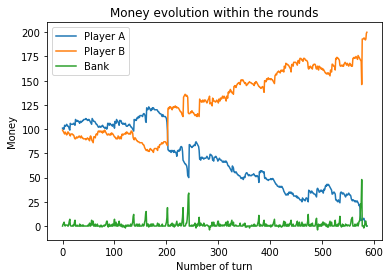

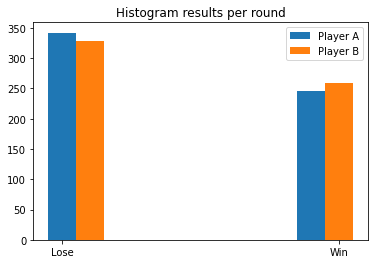

In [80]:
"""
Initial conditions: 
"""
bank=Bank()
ply1=Players(100)        #Initial money Player 1,2
ply2=Players(100)
N=ply1.money+ply2.money  #Converved quantity
bank.initial_bet(ply1, ply2)  #Initial bet of each player 
K=[]
ply1_list=[]
ply2_list=[]
bank_list=[]
ply1_winCounter=[]
ply2_winCounter=[]

game_execution(bank, ply1, ply2, K, ply1_list, ply2_list, bank_list, ply1_winCounter, ply2_winCounter)
plot_history(K,ply1_list, ply2_list, bank_list)
plot_histogram(ply1_winCounter, ply2_winCounter, "round")

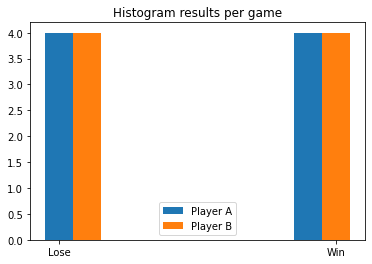

In [88]:
"""
A histogram is plotted by the win/lose results for each player per game. Noticing that every game has a total of 1000 rounds.
"""

ply1_gameCounter=[]
ply2_gameCounter=[]
num_Games=10

for j in range(num_Games):
  bank=Bank()
  ply1=Players(100)        #Dinero inicial Player 1,2
  ply2=Players(100)
  N=ply1.money+ply2.money  #Dinero conservado
  bank.initial_bet(ply1, ply2)

  game_execution(bank, ply1, ply2, K, ply1_list, ply2_list, bank_list, ply1_winCounter, ply2_winCounter)
  if ply1.money==0:
    ply1_gameCounter.append(0)
    ply2_gameCounter.append(1)
    
  elif ply2.money==0:
    ply1_gameCounter.append(1)
    ply2_gameCounter.append(0)

  elif j==num_Games-1:
    ply1_gameCounter.append(0)
    ply2_gameCounter.append(0)

plot_histogram(ply1_gameCounter, ply2_gameCounter, "game")